## Data Science Project 1(Udacity)

2019 Airbnb Dataset was used to complete this project. The motivation behind this project, is to help guest visiting NYC, make better booking decision based on room types available, locations and price.

## Business Understanding

Three questions that I would like to explore as a guest visting NYC booking with Airbnb.
1. What are the room types available?
2. Location and available listing?
3. Average price per night base on location and room type?

## Import the necessary libraries and read in csv file

The following libraries was used 
1.Numpy
2.Pandas
3.Seaborn
4.matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('AB_NYC_2019.csv.zip')

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Preparation

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
print(df.shape)

(48895, 16)


In [4]:
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [5]:
# Dropping columns

df.drop(columns=['host_id','host_name'], inplace=True)

In [6]:
df

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
# Replace all NaN value with 0

df.fillna(0)

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


In [8]:
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
df.hist

<bound method hist_frame of              id                                               name  \
0          2539                 Clean & quiet apt home by the park   
1          2595                              Skylit Midtown Castle   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !   
3          3831                    Cozy Entire Floor of Brownstone   
4          5022   Entire Apt: Spacious Studio/Loft by central park   
...         ...                                                ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   
48891  36485057      Affordable room in Bushwick/East Williamsburg   
48892  36485431            Sunny Studio at Historical Neighborhood   
48893  36485609               43rd St. Time Square-cozy single bed   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen   

      neighbourhood_group       neighbourhood  latitude  longitude  \
0                Brooklyn          Kensington  40.64749  -73.

In [10]:
df['name'].unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Sunny Studio at Historical Neighborhood',
       '43rd St. Time Square-cozy single bed',
       "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object)

In [11]:
df['name'].value_counts().head(10)

Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Loft Suite @ The Box House Hotel              11
Private Room                                  11
Artsy Private BR in Fort Greene Cumberland    10
Private room                                  10
Private room in Brooklyn                       8
Beautiful Brooklyn Brownstone                  8
Name: name, dtype: int64

In [12]:
df['name']

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [13]:
df.corr()


,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
latitude,-0.003125,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


## Data exploration

# Q1. What are the room types available?

In [41]:
# These are the room types available in the 5 Boroughs of New York City

df['room_type']


0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [42]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

##  Q2. Location and available listings

In [15]:
# Boroughs with the highest listing
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [16]:
df.groupby(['neighbourhood_group'])

In [17]:
neighbourhood_group_grp = df.groupby(['neighbourhood_group'])

In [18]:
# Break down of the room types in the 5 Boroughs of New York City
neighbourhood_group_grp['room_type'].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

In [19]:
# breakdown of each boroughs with the highest listing available

Manhattan = df[df.neighbourhood_group == 'Manhattan']

In [20]:
Manhattan['neighbourhood'].value_counts()

Harlem                 2658
Upper West Side        1971
Hell's Kitchen         1958
East Village           1853
Upper East Side        1798
Midtown                1545
East Harlem            1117
Chelsea                1113
Lower East Side         911
Washington Heights      899
West Village            768
Financial District      744
Murray Hill             485
Kips Bay                470
Greenwich Village       392
Chinatown               368
SoHo                    358
Morningside Heights     346
Gramercy                338
Theater District        288
Nolita                  253
Inwood                  252
Tribeca                 177
Little Italy            121
Flatiron District        80
NoHo                     78
Roosevelt Island         77
Two Bridges              72
Battery Park City        70
Civic Center             52
Stuyvesant Town          37
Marble Hill              12
Name: neighbourhood, dtype: int64

In [21]:
Brooklyn = df[df.neighbourhood_group == 'Brooklyn']

In [22]:
Brooklyn['neighbourhood'].value_counts()

Williamsburg                 3920
Bedford-Stuyvesant           3714
Bushwick                     2465
Crown Heights                1564
Greenpoint                   1115
Flatbush                      621
Clinton Hill                  572
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Sunset Park                   390
Prospect Heights              357
South Slope                   284
Gowanus                       247
Carroll Gardens               233
East New York                 218
Boerum Hill                   177
Kensington                    175
Sheepshead Bay                164
Windsor Terrace               157
Brooklyn Heights              154
Canarsie                      147
Bay Ridge                     141
Borough Park                  136
Cypress Hills                 135
Midwood                       109
Cobble Hill                    99
Downtown Brooklyn              83
Flatlands     

In [23]:
Queens = df[df.neighbourhood_group == 'Queens']

In [24]:
Queens['neighbourhood'].value_counts()

Astoria                900
Long Island City       537
Flushing               426
Ridgewood              423
Sunnyside              363
Ditmars Steinway       309
Elmhurst               237
Woodside               235
Jamaica                231
Jackson Heights        186
East Elmhurst          185
Forest Hills           144
Maspeth                110
Rego Park              106
Richmond Hill           94
Woodhaven               88
Springfield Gardens     85
Arverne                 77
St. Albans              76
Corona                  64
Ozone Park              62
Queens Village          60
Rosedale                59
Rockaway Beach          56
Briarwood               56
Glendale                54
South Ozone Park        40
Bayside                 39
Fresh Meadows           32
Kew Gardens             32
Middle Village          31
Far Rockaway            29
Kew Gardens Hills       26
Cambria Heights         26
Howard Beach            20
Jamaica Estates         19
College Point           19
L

## Q3. Price range in the borough

In [25]:
neighbourhood_group_grp['price'].mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [26]:
neighbourhood_group_grp['price'].agg(['median','mean','max'])

,median,mean,max
neighbourhood_group,,,
Bronx,65,87.496792,2500
Brooklyn,90,124.383207,10000
Manhattan,150,196.875814,10000
Queens,75,99.517649,10000
Staten Island,75,114.812332,5000


In [27]:
df.groupby(['room_type'])

In [28]:
room_type_grp = df.groupby(['room_type'])

In [29]:
room_type_grp['price'].agg(['median','mean','max'])

,median,mean,max
room_type,,,
Entire home/apt,160,211.794246,10000
Private room,70,89.780973,10000
Shared room,45,70.127586,1800


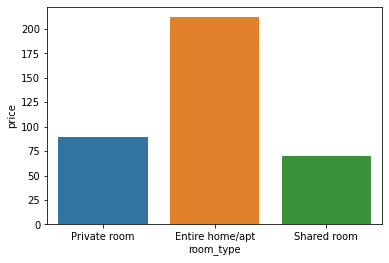

In [30]:
ax = sns.barplot(x ='room_type', y ='price', data = df, ci = None)

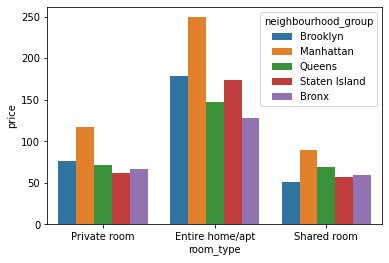

In [31]:
ax = sns.barplot(x ='room_type', y ='price', data = df, ci = None, hue ='neighbourhood_group')

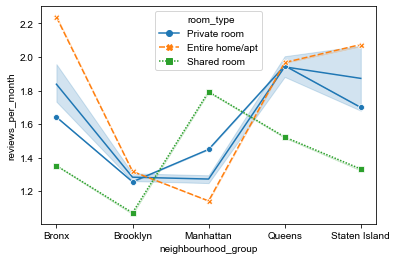

In [32]:
ax = sns.lineplot(x = 'neighbourhood_group', y = 'reviews_per_month', data = df)
ax = sns.lineplot(x = 'neighbourhood_group', y = 'reviews_per_month', data = df, hue ='room_type',style = 'room_type', ci=False, markers=True)
sns.set(rc={'figure.figsize':(12,10)})

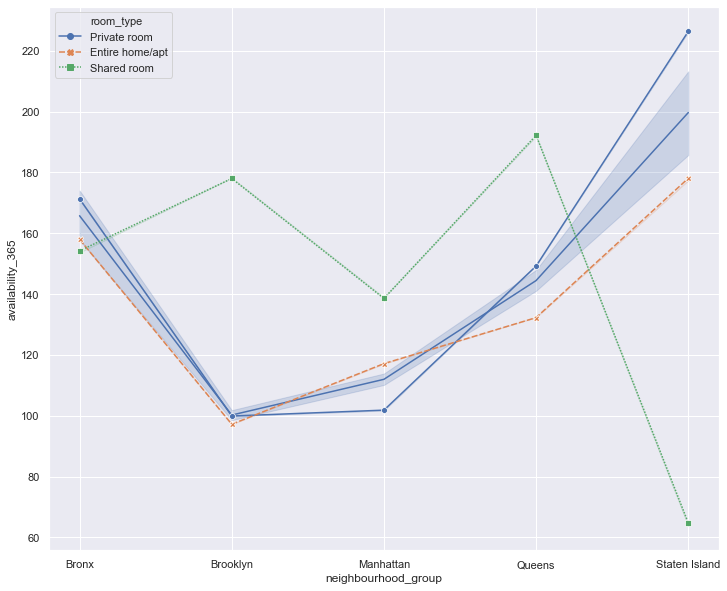

In [33]:
ax = sns.lineplot(x = 'neighbourhood_group', y = 'availability_365', data = df)
ax = sns.lineplot(x = 'neighbourhood_group', y = 'availability_365', data = df, hue ='room_type',style = 'room_type', ci=False, markers=True)
sns.set(rc={'figure.figsize':(12,10)})

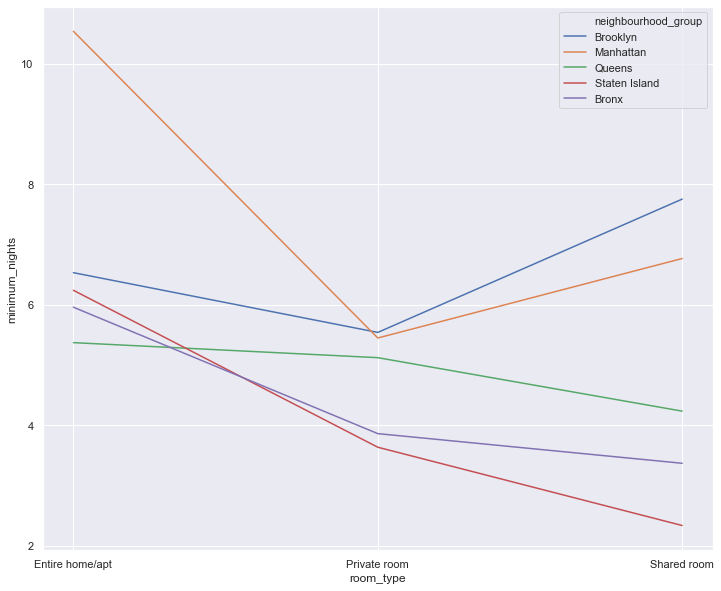

In [34]:
ax = sns.lineplot(x ='room_type', y ='minimum_nights', data = df, ci = None, hue ='neighbourhood_group')

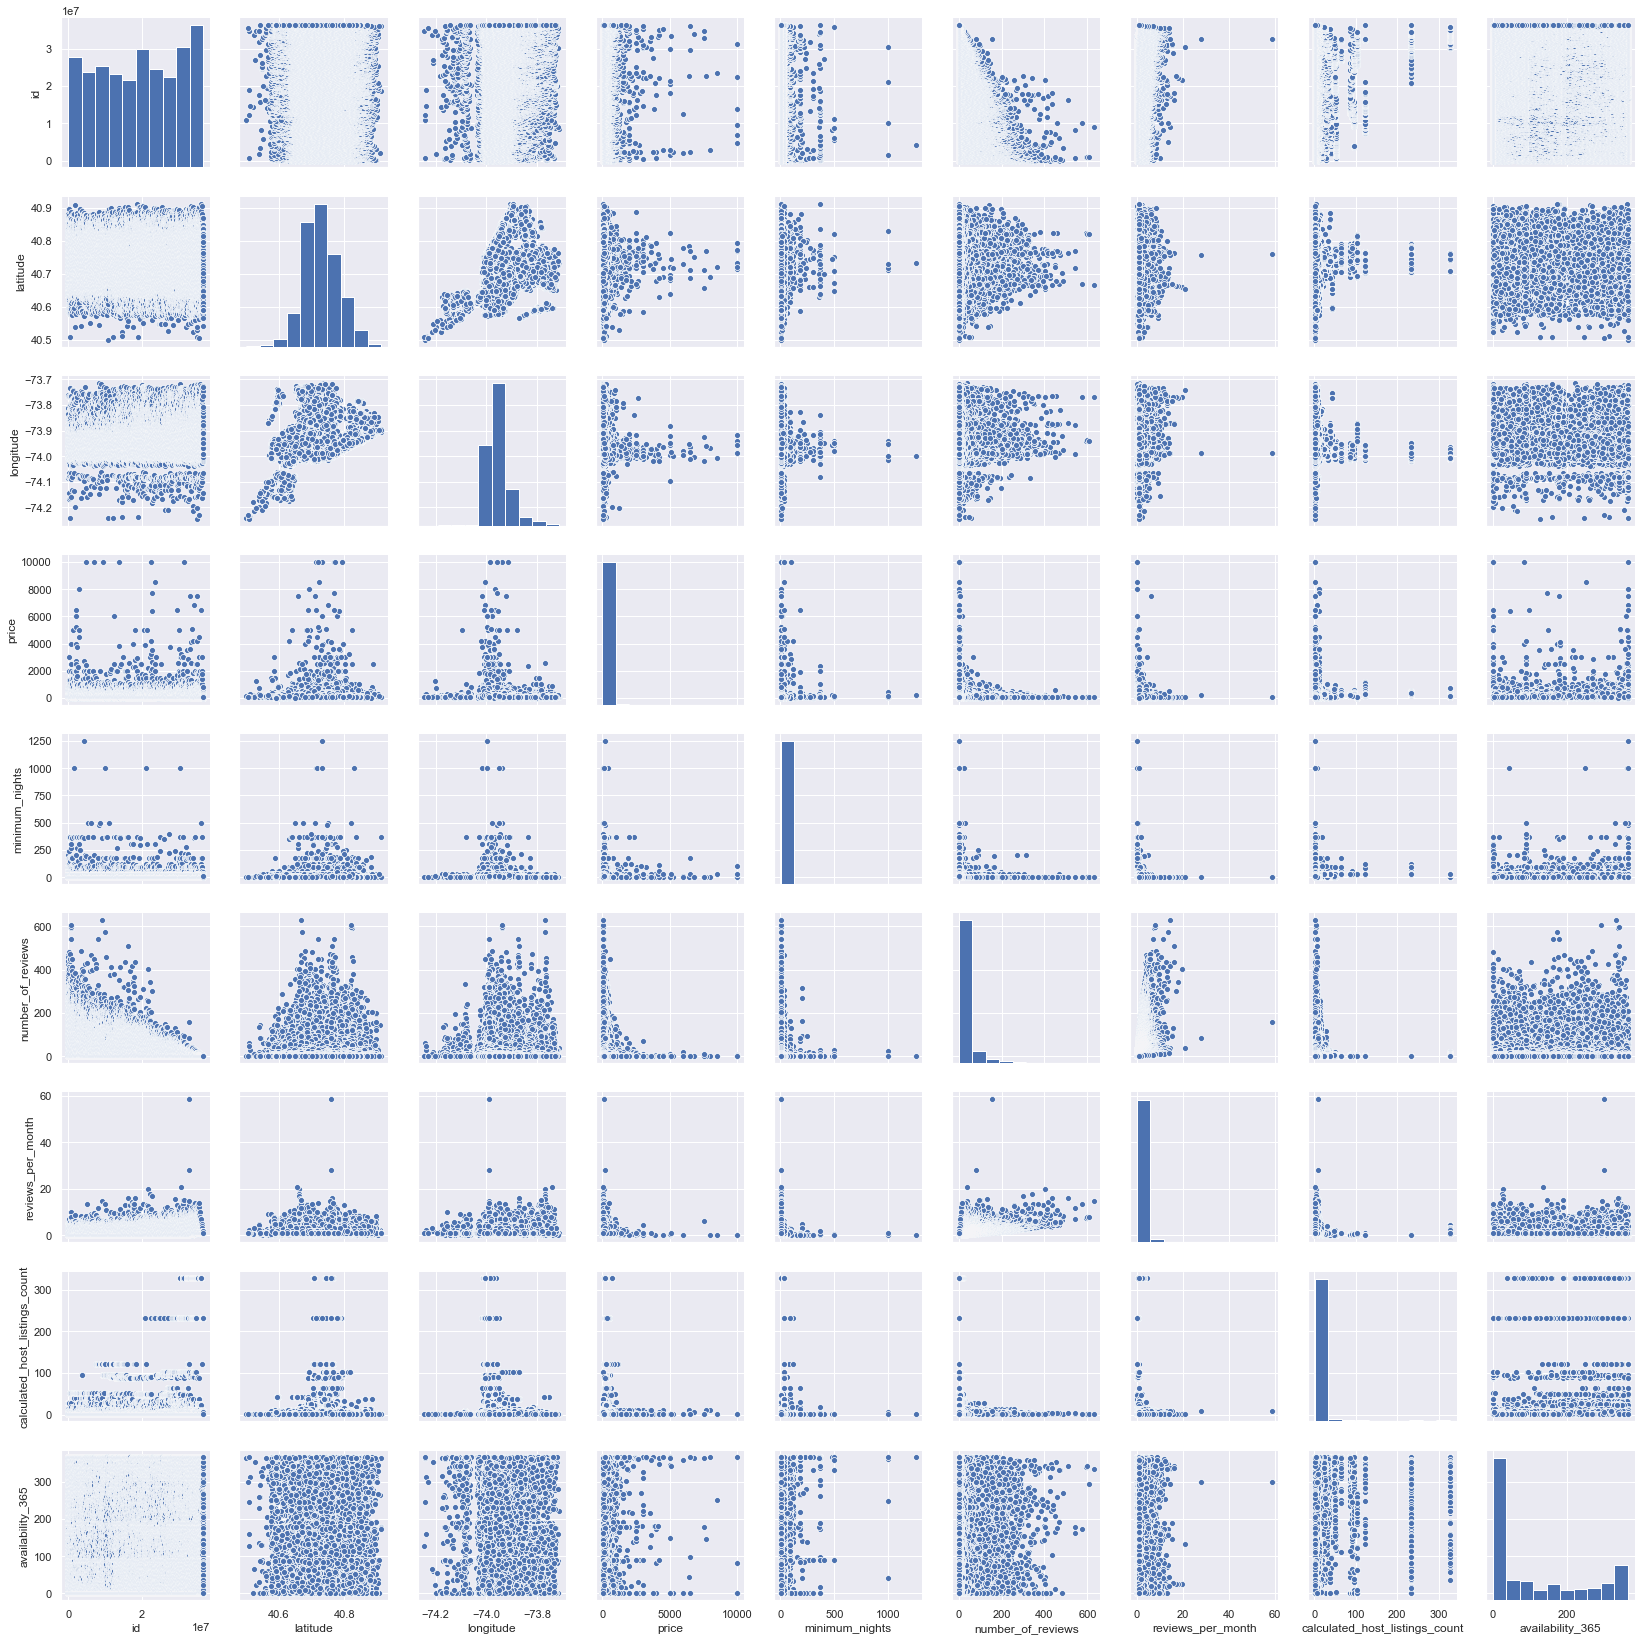

In [35]:
sns.pairplot(df)
sns.set(rc={'figure.figsize':(15,10)})

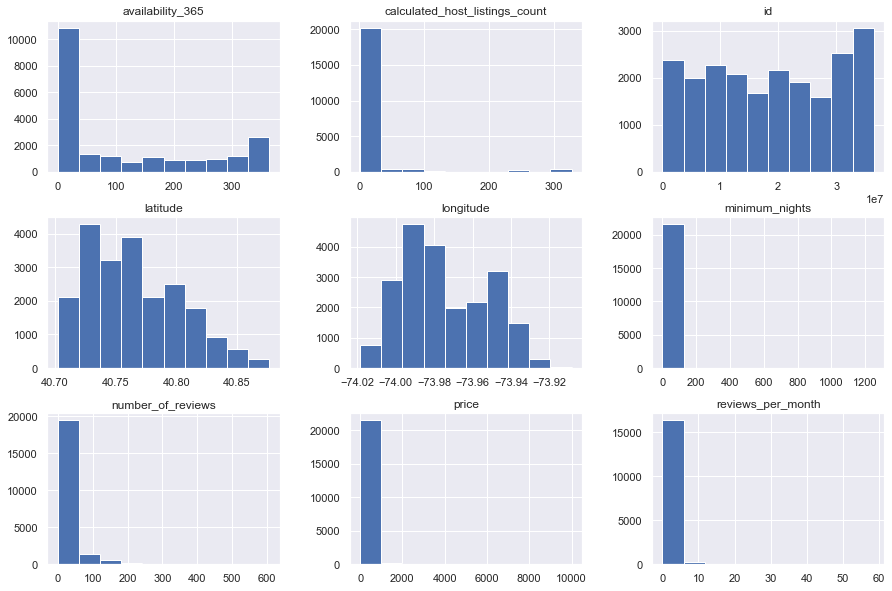

In [36]:
Manhattan.hist()
sns.set(rc={'figure.figsize':(15,10)})

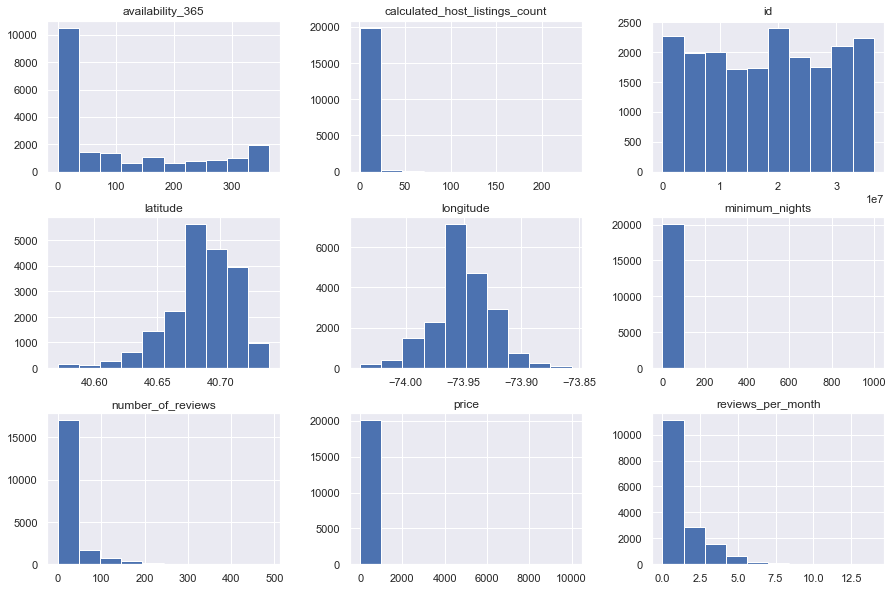

In [37]:
Brooklyn.hist()
sns.set(rc={'figure.figsize':(15,10)})

In [38]:
dc = df.corr()

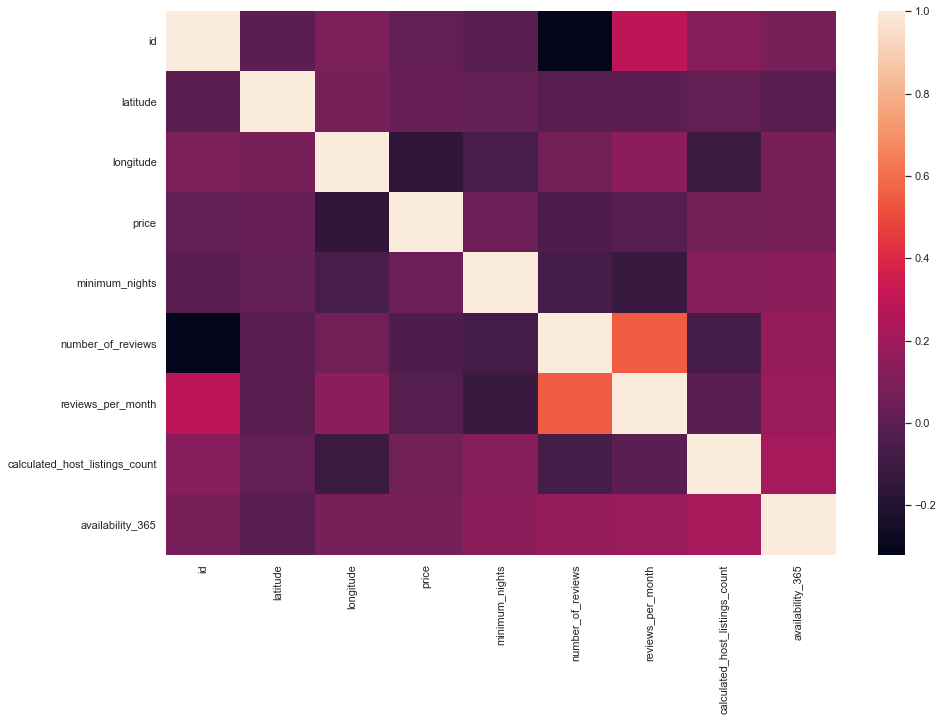

In [39]:
sns.heatmap(dc)